Dataset Download  
~/.kaggle/kaggle.json API Tokken 등록 필요  
[웨이퍼(Wafer) 이미지 데이터, Kaggle](https://www.kaggle.com/datasets/alexandremoritz/simulated-analog-wafer-pattern-recognition)

In [7]:
!pip install kaggle --upgrade

In [8]:
!pip show kaggle

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [9]:
!kaggle config view

Configuration values from /Users/rocket/.kaggle
- username: rocketa
- path: None
- proxy: None
- competition: None


In [10]:
# Data Download
!kaggle datasets download -d alexandremoritz/simulated-analog-wafer-pattern-recognition -p ../data/wafer_image
!unzip ../data/wafer_image/simulated-analog-wafer-pattern-recognition.zip -d ../data/wafer_image/
!rm ../data/wafer_image/simulated-analog-wafer-pattern-recognition.zip

In [11]:
# Data Information
!grep -A 10 '5. Number of Instances:' ../data/wafer_image/'Data Set Description.txt'

5. Number of Instances: 
  |--------------------------------------------------------------|
  |      Dataset       |  # of instances  |  Wafermap numbers    |
  |--------------------------------------------------------------|
  |   training_1.csv   |     3.501.800    |      1  to  200      |
  |   training_2.csv   |     3.501.800    |    201  to  400      |
  |   training_3.csv   |     3.501.800    |    401  to  600      |
  |   training_4.csv   |     3.501.800    |    601  to  800      |
  |--------------------------------------------------------------|
  |      test.csv      |     3.501.800    |    801  to 1000      |
  |--------------------------------------------------------------|


In [12]:
!head -n 3 ../data/wafer_image/training_1.csv

"lot";"wafer";"x";"y";"ring";"spot";"trend";"twospots";"crescent";"ring_pure";"spot_pure";"trend_pure";"twospots_pure";"crescent_pure"
"Lot_1";1;1;67;0,0332031730845769;6,48519201883132e-05;0,312294593060493;0,0390430665764935;0,00771987128577758;0,0325758284622229;6,54906689829159e-10;0,285687707722175;0,0395706499953045;-4,84314598172959e-17
"Lot_1";1;1;68;0,0328173889580282;-4,66246954348572e-06;0,288024790081015;0,0405631417212302;0,00263633379698886;0,0327267641746118;8,76695244240241e-10;0,281496623060313;0,0404069156343969;-5,07606418493978e-17


In [13]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import Dataset

In [14]:
#import numpy as py
#import pandas as pd

data_path = "../data/wafer_image/"

df = pd.DataFrame()

for i in range(1, 5):
    tmp_df = pd.read_csv(data_path+"training_"+str(i)+".csv",
                         sep=";",
                         decimal=",",
                         usecols=["lot", "wafer", "x", "y", "ring", "spot", "trend", "twospots", "crescent"],
                         dtype={
                             "lot":np.string_,
                             "wafer":np.int16,
                             "x":np.int16,
                             "y":np.int16,
                             "ring":np.float64,
                             "spot":np.float64,
                             "trend":np.float64,
                             "twospot":np.float64,
                             "cresent":np.float64}
                         )
    
    df = pd.concat([df, tmp_df])

In [15]:
df

,lot,wafer,x,y,ring,spot,trend,twospots,crescent
0,Lot_1,1,1,67,0.033203,0.000065,0.312295,0.039043,0.007720
1,Lot_1,1,1,68,0.032817,-0.000005,0.288025,0.040563,0.002636
2,Lot_1,1,1,69,0.033321,0.000025,0.261521,0.041602,-0.000592
3,Lot_1,1,1,70,0.032707,-0.000014,0.290741,0.040822,0.008510
4,Lot_1,1,1,71,0.032220,-0.000049,0.256578,0.042526,0.009654
...,...,...,...,...,...,...,...,...,...
3501795,Lot_4,800,115,100,0.018768,-0.000043,0.109156,0.022271,0.459549
3501796,Lot_4,800,115,101,0.019081,0.000044,0.065658,0.020364,0.452284
3501797,Lot_4,800,115,102,0.018777,-0.000080,0.102442,0.021448,0.450957
3501798,Lot_4,800,115,103,0.019788,0.000130,0.085091,0.021478,0.447663


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14007200 entries, 0 to 3501799
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   lot       object 
 1   wafer     int16  
 2   x         int16  
 3   y         int16  
 4   ring      float64
 5   spot      float64
 6   trend     float64
 7   twospots  float64
 8   crescent  float64
dtypes: float64(5), int16(3), object(1)
memory usage: 828.2+ MB


In [17]:
df.describe()

,wafer,x,y,ring,spot,trend,twospots,crescent
count,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07,1.400720e+07
mean,4.005000e+02,5.678257e+01,9.700611e+01,5.469679e-03,2.665826e-04,9.735479e-01,4.543228e-03,5.268330e-02
std,2.309399e+02,2.899683e+01,4.824405e+01,1.159486e-02,7.129806e-04,7.868547e-01,7.058368e-03,1.055552e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.427011e-02,-8.456652e-04,-1.117635e+00,-3.947682e-03,-8.058853e-02
25%,2.007500e+02,3.300000e+01,5.800000e+01,-9.795015e-05,-2.485631e-05,3.922994e-01,2.030534e-04,-1.953638e-03
50%,4.005000e+02,5.700000e+01,9.700000e+01,7.707439e-04,3.904528e-05,9.195956e-01,1.149917e-03,7.280033e-03
75%,6.002500e+02,8.000000e+01,1.360000e+02,6.223677e-03,1.707593e-04,1.554746e+00,6.192340e-03,5.214216e-02
max,8.000000e+02,1.150000e+02,1.930000e+02,1.100063e-01,8.482756e-03,3.165528e+00,4.690239e-02,9.146742e-01


In [18]:
df.isnull().sum()

lot         0
wafer       0
x           0
y           0
ring        0
spot        0
trend       0
twospots    0
crescent    0
dtype: int64

In [19]:
df["lot"].unique()

array(['Lot_1', 'Lot_2', 'Lot_3', 'Lot_4'], dtype=object)

In [20]:
df["wafer"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
print(df["x"].unique().min())
print(df["x"].unique().max())

1
115


In [22]:
print(df["y"].unique().min())
print(df["y"].unique().max())

1
193


LOT 번호 : Lot1~Lot4, 웨이퍼 번호 : 1~800, X 크기 : 1~115, y 크기 : 1~193

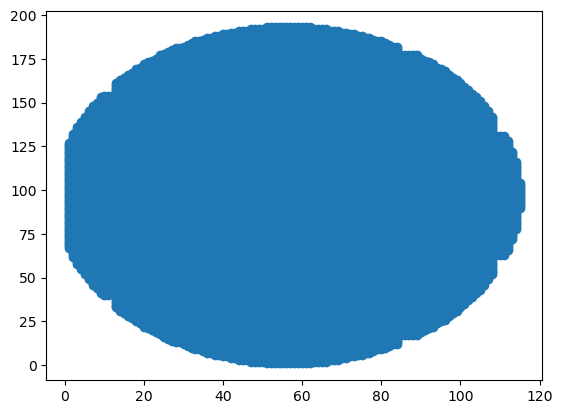

In [23]:
#import matplotlib.pyplot as plt

wafer_xy = df[["wafer", "x", "y"]]
plt.scatter(x=wafer_xy[wafer_xy["wafer"]==1]["x"], y=wafer_xy[wafer_xy["wafer"]==1]["y"])
plt.show()

In [24]:
def create_image(df, wafer_id, pattern):
    
    Image =np.zeros([193, 115])
    
    for i, row in df[df["wafer"]==wafer_id].iterrows():
        Image[(row["y"]-1), row["x"]-1] = row[pattern]

    return Image

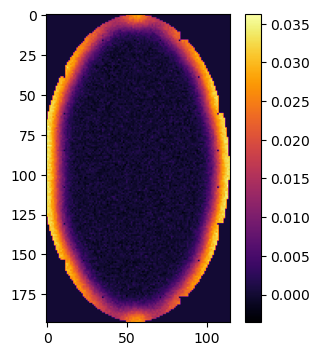

In [25]:
plt.figure(figsize=(4,4))
plt.imshow(create_image(df, 1, "ring"), cmap="inferno")
plt.colorbar()
plt.show()

In [26]:
pattern_list=df.columns[4:].to_list()

In [52]:
def create_images_from_df(df, wafer_id):
    
    images=[]
    labels=[]

    for index, feature in enumerate(pattern_list):
        image = np.copy(df[df["wafer"]==wafer_id].pivot(index="x", columns="y", values=feature).fillna(0).values)
        images.append(image)
        labels.append(index)
    
    return images, labels

In [53]:
create_images_from_df(df, 1)

([array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 

In [54]:
#from tqdm import tqdm

all_images=[]
all_labels=[]

for id in tqdm(df["wafer"].unique()):
    image, label = create_images_from_df(df, id)
    
    all_images.extend(image)
    all_labels.extend(label)

image_df = pd.DataFrame({"image":all_images, "label":all_labels})

100%|██████████| 800/800 [00:14<00:00, 56.96it/s]


In [55]:
image_df

,image,label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4
...,...,...
3995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3


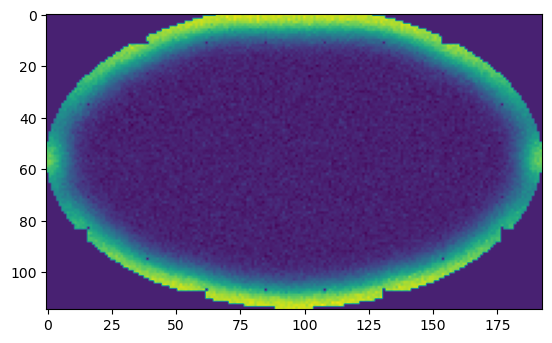

In [56]:
plt.imshow(image_df["image"][0])

In [57]:
print(np.min(image_df["image"].to_list()))
print(np.max(image_df["image"].to_list()))

-1.11763458961258
3.16552793555252


In [90]:
#import torch
#from torchvision import transforms
#from torch.utils.data import Dataset

class WaferDataSet(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform=transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        image = torch.tensor(self.df.iloc[idx, 0]).float()
        label = torch.tensor(self.df.iloc[idx, 1])

        if self.transform:
            image = self.transform(image)

        return image, label

In [91]:
def min_max_scaling(img):
    min_val = torch.min(img)
    max_val = torch.max(img)

    if max_val - min_val < 1e-9:
        return img
    else:
        return (img - min_val)/(max_val - min_val)
    
resize_transform = transforms.Compose(
    [transforms.Lambda(min_max_scaling),
     transforms.ToPILImage(),
     transforms.Resize((96, 96)),
     transforms.ToTensor()]
)

In [92]:
WaferData = WaferDataSet(image_df)


In [93]:
len(WaferData)

4000

In [94]:
image, label = WaferData[0]

In [95]:
image.shape

torch.Size([115, 193])

In [66]:
label

tensor(0)

In [96]:
WaferData = WaferDataSet(image_df, resize_transform)

In [113]:
image, label = WaferData[3]

In [114]:
image.shape

torch.Size([1, 96, 96])

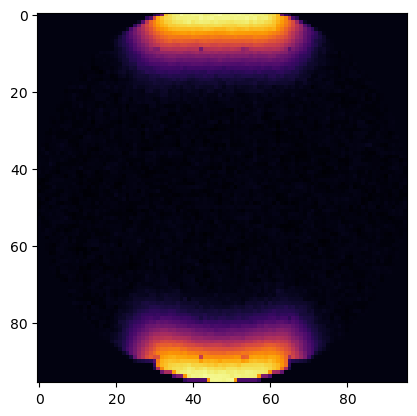

In [115]:
plt.imshow(image.squeeze(0).numpy(), cmap='inferno')
plt.show()

In [122]:
import pickle
# list data dump
image_path = "../data/wafer_image/image.pkl"
label_path = "../data/wafer_image/label.pkl"

with open(image_path, "wb") as f:
    pickle.dump(all_images, f)

with open(label_path, "wb") as f:
    pickle.dump(label, f)